<a href="https://colab.research.google.com/github/Sprt6I/pytorch-Tutorial/blob/main/NEXT_01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
weigth = 0.7
bias = 0.3

start = 0
end = 4
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1)
y = weigth*X+bias

In [58]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [59]:
len(X), len(y)

(100, 100)

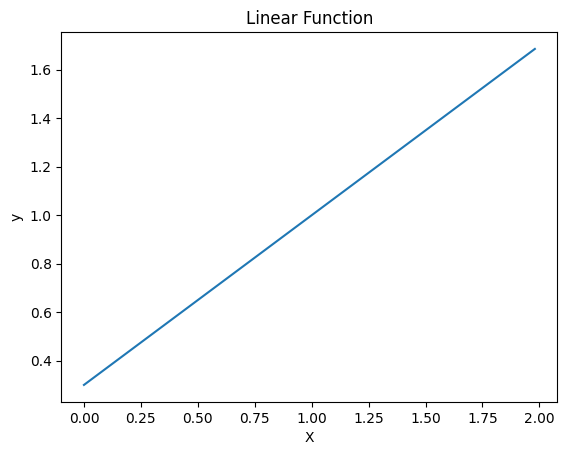

In [60]:
plt.title('Linear Function')
plt.xlabel('X')
plt.ylabel('y')

plt.plot(X, y)

plt.show()

In [61]:
split = int(len(X)*0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(y_train), len(X_test),len(y_test)

(80, 80, 20, 20)

In [62]:
def predictions(title='Train/Text Set',X_train=X_train, y_train=y_train, X_test=X_test, y_text=y_test, xLabel='X', yLabel='y', predictions=None):
  plt.title('Train/Test Set')
  plt.xlabel('X')
  plt.ylabel('y')

  plt.scatter(X_train, y_train,s=4,color='g',label='Train')
  plt.scatter(X_test, y_test,s=4,color='r',label="Test")

  if predictions is not None:
    plt.scatter(X_test, predictions, s=4, color='b', label='Predicions')

  plt.legend()
  plt.show()

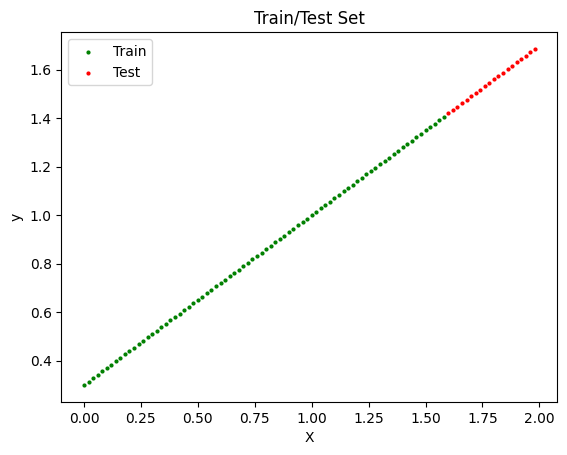

In [63]:
predictions()

# Model

In [64]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weigth = nn.Parameter(torch.randn(1, dtype=torch.float64), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float64), requires_grad=True)


  def forward(self, inp: torch.Tensor) -> torch.Tensor:
    return self.weigth*inp+self.bias

In [128]:
torch.manual_seed(42)
model = LinearModel()

In [129]:
model.state_dict(), list(model.parameters())

(OrderedDict([('weigth', tensor([0.3367], dtype=torch.float64)),
              ('bias', tensor([0.1288], dtype=torch.float64))]),
 [Parameter containing:
  tensor([0.3367], dtype=torch.float64, requires_grad=True),
  Parameter containing:
  tensor([0.1288], dtype=torch.float64, requires_grad=True)])

In [130]:
with torch.inference_mode():
  y_pred = model(X_test)

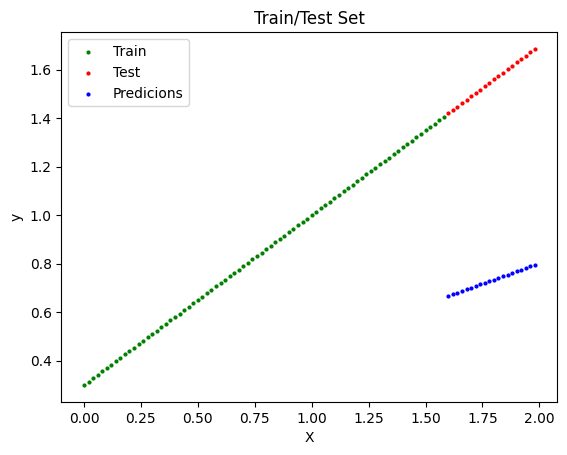

In [131]:
predictions(predictions=y_pred)

loss function -> measures how wrong are models predictions                    
optimizer -> based on loss function adjust models parameters

In [132]:
loss_fn = nn.L1Loss()

optim = torch.optim.SGD(params=model.parameters(),lr=0.0001)

OrderedDict([('weigth', tensor([0.3368], dtype=torch.float64)), ('bias', tensor([0.1289], dtype=torch.float64))])


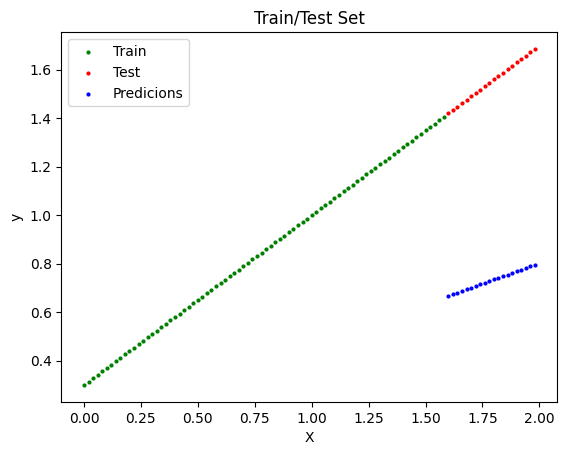

OrderedDict([('weigth', tensor([0.4158], dtype=torch.float64)), ('bias', tensor([0.2289], dtype=torch.float64))])


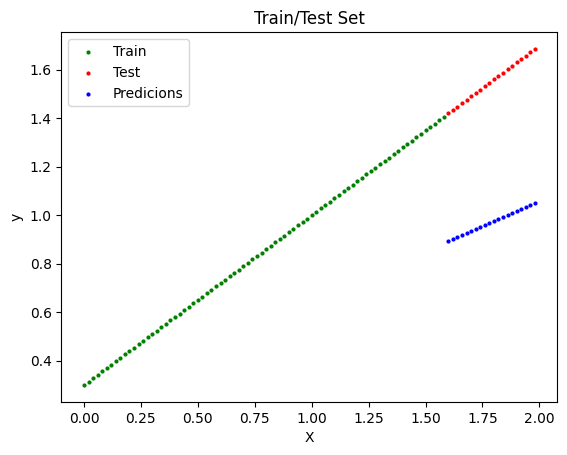

OrderedDict([('weigth', tensor([0.4947], dtype=torch.float64)), ('bias', tensor([0.3262], dtype=torch.float64))])


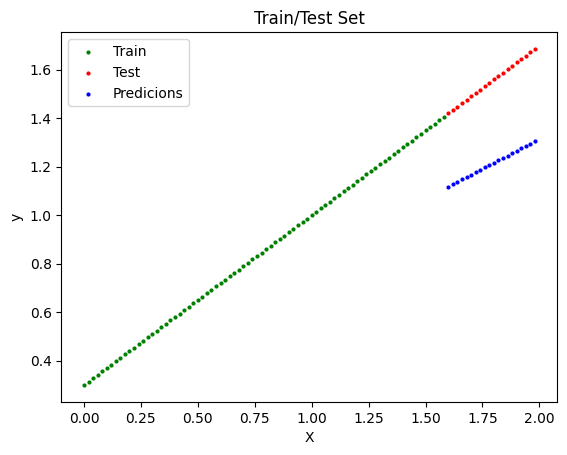

OrderedDict([('weigth', tensor([0.5644], dtype=torch.float64)), ('bias', tensor([0.3800], dtype=torch.float64))])


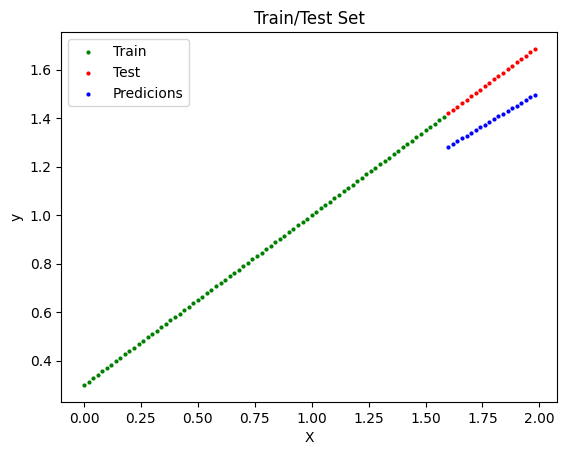

OrderedDict([('weigth', tensor([0.6064], dtype=torch.float64)), ('bias', tensor([0.3832], dtype=torch.float64))])


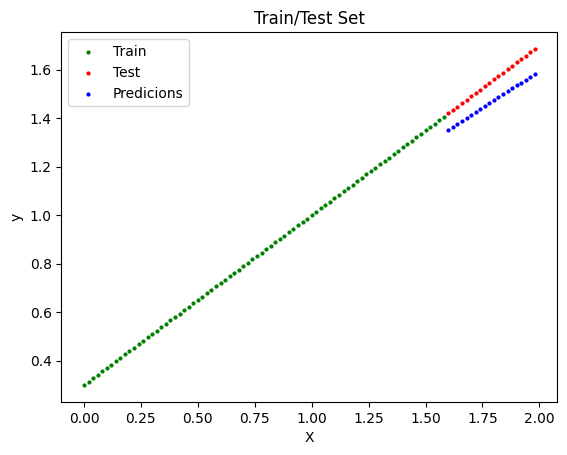

OrderedDict([('weigth', tensor([0.6311], dtype=torch.float64)), ('bias', tensor([0.3654], dtype=torch.float64))])


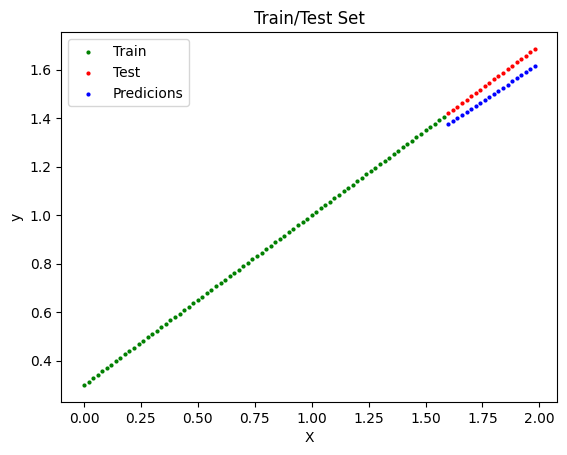

OrderedDict([('weigth', tensor([0.6532], dtype=torch.float64)), ('bias', tensor([0.3449], dtype=torch.float64))])


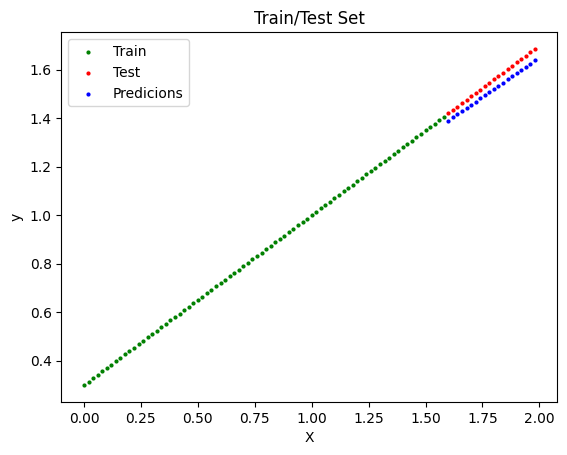

OrderedDict([('weigth', tensor([0.6750], dtype=torch.float64)), ('bias', tensor([0.3240], dtype=torch.float64))])


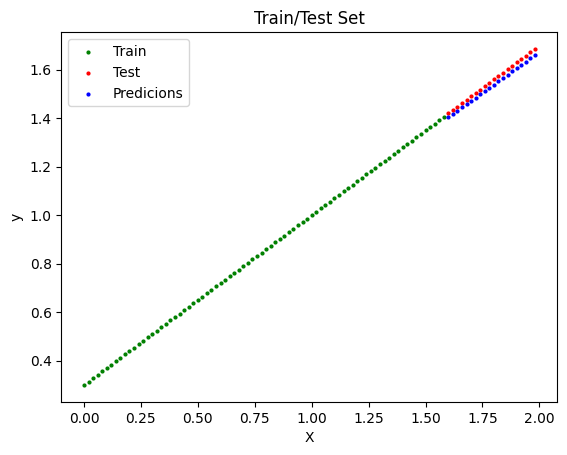

OrderedDict([('weigth', tensor([0.6967], dtype=torch.float64)), ('bias', tensor([0.3031], dtype=torch.float64))])


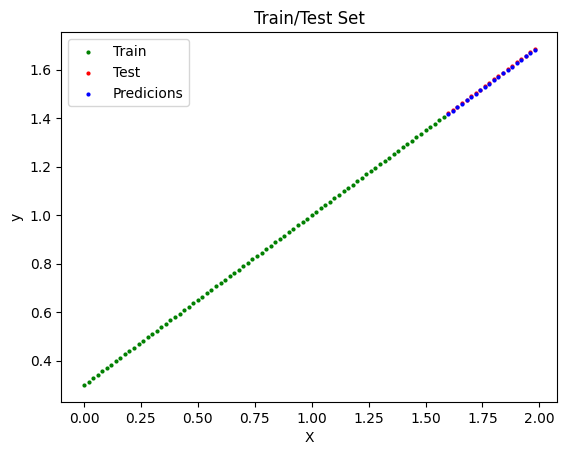

OrderedDict([('weigth', tensor([0.7000], dtype=torch.float64)), ('bias', tensor([0.3000], dtype=torch.float64))])


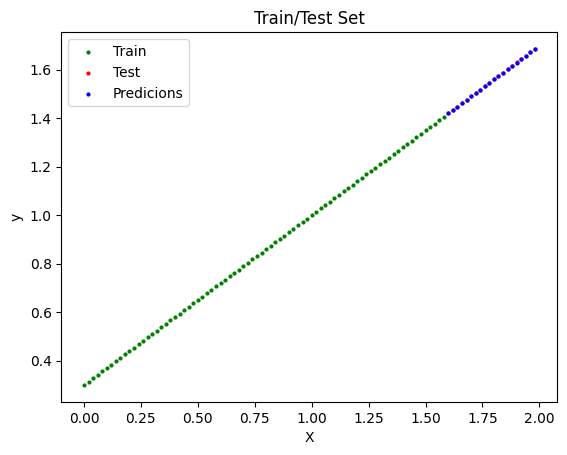

OrderedDict([('weigth', tensor([0.7000], dtype=torch.float64)), ('bias', tensor([0.3000], dtype=torch.float64))])


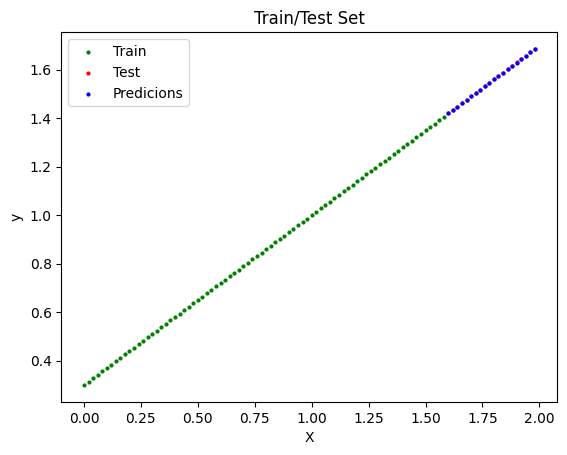

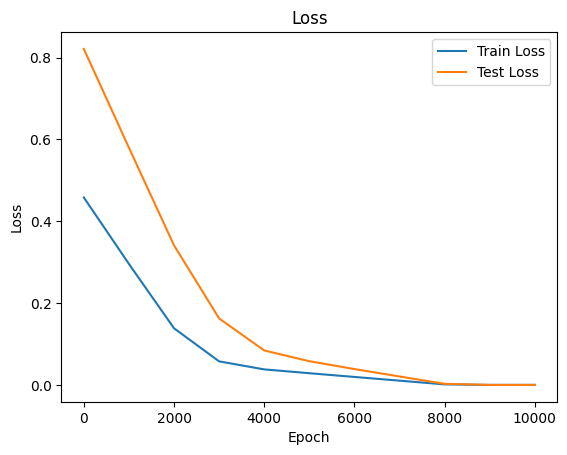

In [133]:
epochs = 10_001
epochCount = []
trainLoss = []
testLoss = []

for epoch in range(epochs):
  val = model(X_train) #Gets output of our model

  loss = loss_fn(val, y_train) #Calculates how wrong our model is

  optim.zero_grad() # Clears gradient of optimizer

  loss.backward() #Calculate hopw to change model values? (Calculates slope of gradient descent)

  optim.step() #Updates Values Of Model

  if epoch%1000==0:
    model.eval()
    print(model.state_dict())
    with torch.inference_mode():
      test_val = model(X_test)
      test_loss = loss_fn(test_val, y_test)
      predictions(predictions=test_val)

    epochCount.append(epoch)
    trainLoss.append(loss.detach().numpy())
    testLoss.append(test_loss.detach().numpy())

    model.train()

plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(epochCount, trainLoss, label='Train Loss')
plt.plot(epochCount, testLoss, label='Test Loss')
plt.legend()